# Evaluation plots

In [141]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.style as style

plt.style.use('seaborn-poster')
sns.set_context(rc={"figure.figsize": (120, 60)})
sns.set_style("whitegrid")
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

In [142]:
style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [143]:
base_dir = './CSVs/'
plot_type = 'AverageEval'
num_iterations = 101
game = 'Seaquest'
approaches = ['MultiplicativeLinear', 'MultiplicativeExp', 'Log']
legends = ['Multiplicative, Linear Bins', 'Multiplicative, Exp. Bins', 'Log Approach']
colors = ['steelblue', 'indianred', 'darkseagreen', 'steelblue']
DCOP = 3500  
uncorrected = 1600

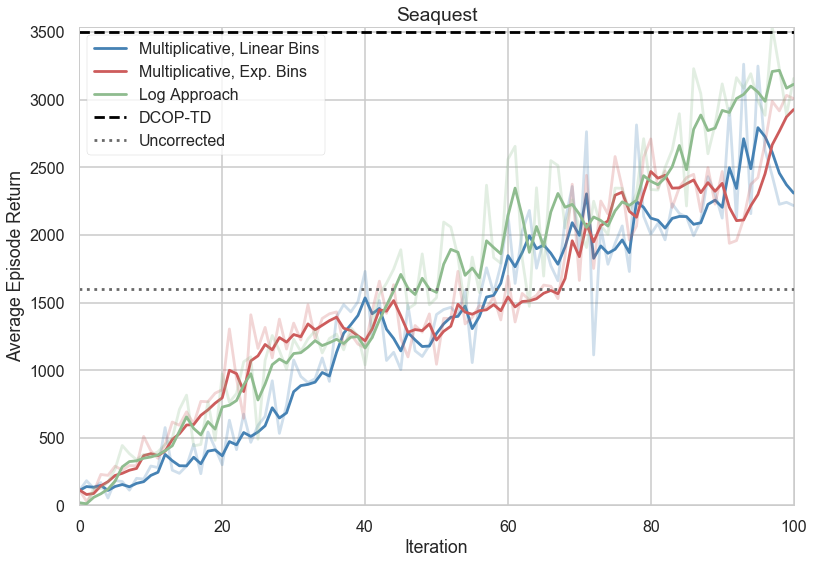

In [163]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
    return smoothed

for idx,approach in enumerate(approaches):
    csv_dir = base_dir + plot_type + game + approach + '.csv'
    data_table = np.genfromtxt(csv_dir, delimiter=',')[1:num_iterations+1,1:num_iterations+1]
    x = data_table[:,0]
    y = data_table[:,1]
    weight = 0.6
    y_smoothed = smooth(y, weight)
    df = pd.DataFrame(y)
    plt.plot(x,y,colors[idx], alpha=0.25)
    plt.plot(x,y_smoothed, colors[idx], label=legends[idx])
if DCOP:
    plt.plot(x,[DCOP for i in range(num_iterations)], 'k', linestyle='--', label='DCOP-TD')
if uncorrected:
    plt.plot(x,[uncorrected for i in range(num_iterations)], 'dimgrey', linestyle=':', label='Uncorrected')
plt.legend(loc="upper left", bbox_to_anchor=(0, 1))
plt.title("Seaquest")
plt.xlabel("Iteration")
plt.ylabel("Average Episode Return")
plt.show()
plt.close()